#### Code 2.1: Computing the pluasibilities 

In [6]:
ways = [0,3,8,9,0]
ways / sum(ways)

5-element Vector{Float64}:
 0.0
 0.15
 0.4
 0.45
 0.0

#### Code: 2.2: Six W's in Nine tosses

In [8]:
using Distributions
pdf(Binomial(9,0.5),6)

0.1640625000000001

#### Code 2.3: Grid approximation of Globe Tossing

In [48]:
# Define the grid 
p_grid = range(0, stop=1, length=20)

# Define Prior 
prior = fill(1,20)

# Compute Likelihood at each value in grid 
likelihood = pdf.(Binomial.(9,p_grid),6)

# Compute product of likelihood and prior 

unstd_posterior = likelihood .* prior

# Standardize the posterior, so it sums to 1 
posterior = unstd_posterior ./ sum(unstd_posterior);

In [47]:
# Above code with sparser grid
p_grid_small = range(0, stop=1, length=5)
prior_small = fill(1,5) 
likelihood_small = pdf.(Binomial.(9,p_grid_small),6)
unstd_posterior_small = likelihood_small .* prior_small 
posterior_small = unstd_posterior_small ./ sum(unstd_posterior_small);

#### Code 2.4: Displaying Posterior distribution

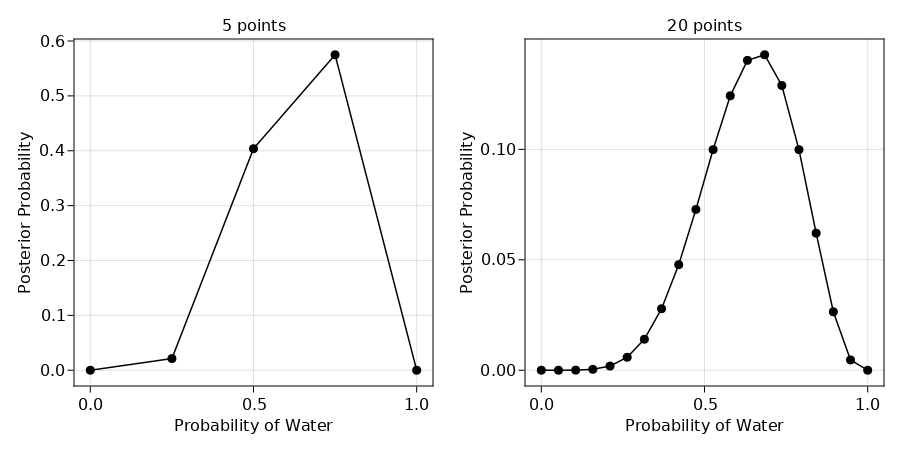

In [77]:
using CairoMakie
fig = Figure(resolution=(900,450))
ax1 = Axis(fig,xlabel="Probability of Water", ylabel="Posterior Probability", title="5 points")
ax2 = Axis(fig, xlabel="Probability of Water", ylabel="Posterior Probability", title="20 points")
scatter!(ax1,p_grid_small,posterior_small, color=:black)
lines!(ax1,p_grid_small,posterior_small,color=:black)

scatter!(ax2,p_grid,posterior,color=:black)
lines!(ax2,p_grid,posterior,color=:black)
fig[1,1] = ax1
fig[1,2] = ax2
fig

In [92]:
prior = p_grid[p_grid .<0.5]
exp.(-5 * abs.(p_grid .- 0.5));

#### Code 2.6: Quadratic Approximation of Globe Tossing

In [86]:
using Turing
using StatisticalRethinking

@model globethrowing(w,l) = begin 
    p ~ Uniform(0,1)    # Uniform Prior
    W ~ Binomial(w+l,p) # Binomial likelihood
end

m = globethrowing(6,3);
# r = quap(m)
# Not Working 
#Error: LAPACKException(2)